In [ ]:
!pip install tensorflow==2.0.0-alpha # for colab

In [15]:

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 400

print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
print(len(train_data), 'train sequences')
print(len(test_data), 'test sequences')

print('Pad sequences (samples x time)')
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)
print('train_data shape:', train_data.shape)
print('test_data shape:', test_data.shape)

train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

print(train_data[0])
print(test_data[0])


Loading data...


25000 train sequences
25000 test sequences
Pad sequences (samples x time)


train_data shape: (25000, 400)
test_data shape: (25000, 400)


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4 

In [16]:

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

train_data = pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)
test_data = pad_sequences(test_data, 
                                                       value=word_index["<PAD>"], 
                                                       padding='post',
                                                       maxlen=256)


print(len(train_data[0]), len(train_data[1]))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, \
    Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Embedding
from tensorflow.nn import relu, sigmoid
from tensorflow.keras.backend import binary_crossentropy


# set parameters:
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250




# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = Sequential()
model.add(Embedding(vocab_size, 16))
#model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
#model.add(Dropout(0.2))
#model.add(Conv1D(filters, kernel_size, padding='valid', activation=relu, strides=1))
#model.add(GlobalMaxPooling1D())
model.add(GlobalAveragePooling1D())
#model.add(Dense(250, activation=relu))
#model.add(Dropout(0.2))
model.add(Dense(16, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.summary()

model.compile(optimizer='adam',
              loss=binary_crossentropy,
              metrics=['acc']
              )


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [19]:
partial_validation_data = train_data[:10000]
partial_train_data = train_data[10000:]

partial_validation_labels = train_labels[:10000]
partial_train_labels = train_labels[10000:]

In [20]:
batch_size = 512 # 32
epochs=40 # 2

history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(partial_validation_data, partial_validation_labels),
                    verbose=1)
# history = model.fit(test_data, test_labels, batch_size=batch_size, epochs=epochs, verbose=1)
model.evaluate(test_data, test_labels)

Train on 15000 samples, validate on 10000 samples


Epoch 1/40
  512/15000 [>.............................] - ETA: 4s - loss: 0.6932 - acc: 0.4863

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.6931 - acc: 0.5127

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.6932 - acc: 0.5078

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.6930 - acc: 0.5113

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.6931 - acc: 0.5060

 7168/15000 [=============>................] - ETA: 0s - loss: 0.6930 - acc: 0.5073

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6929 - acc: 0.5085



 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6928 - acc: 0.5098

10752/15000 [====================>.........] - ETA: 0s - loss: 0.6927 - acc: 0.5124

12288/15000 [=======================>......] - ETA: 0s - loss: 0.6925 - acc: 0.5153

13312/15000 [=========================>....] - ETA: 0s - loss: 0.6924 - acc: 0.5177

14848/15000 [============================>.] - ETA: 0s - loss: 0.6923 - acc: 0.5174

15000/15000 [==============================] - 1s 66us/sample - loss: 0.6923 - acc: 0.5180 - val_loss: 0.6907 - val_acc: 0.5387


Epoch 2/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6899 - acc: 0.5625

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6902 - acc: 0.5410

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.6899 - acc: 0.5446

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.6897 - acc: 0.5543

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.6893 - acc: 0.5669

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6890 - acc: 0.5715

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6888 - acc: 0.5697

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6886 - acc: 0.5739

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6882 - acc: 0.5930

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6879 - acc: 0.6090

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6874 - acc: 0.6239

15000/15000 [==============================] - 1s 50us/sample - loss: 0.6872 - acc: 0.6293 - val_loss: 0.6833 - val_acc: 0.6849


Epoch 3/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6820 - acc: 0.7051

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6815 - acc: 0.6816

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.6809 - acc: 0.6761

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.6805 - acc: 0.6787

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.6800 - acc: 0.6797

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6797 - acc: 0.6842

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.6792 - acc: 0.6891

 8704/15000 [================>.............] - ETA: 0s - loss: 0.6789 - acc: 0.6945

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6781 - acc: 0.7023

10752/15000 [====================>.........] - ETA: 0s - loss: 0.6776 - acc: 0.7038

12288/15000 [=======================>......] - ETA: 0s - loss: 0.6769 - acc: 0.7079

13824/15000 [==========================>...] - ETA: 0s - loss: 0.6760 - acc: 0.7140

14848/15000 [============================>.] - ETA: 0s - loss: 0.6753 - acc: 0.7181

15000/15000 [==============================] - 1s 57us/sample - loss: 0.6752 - acc: 0.7180 - val_loss: 0.6679 - val_acc: 0.7394


Epoch 4/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6633 - acc: 0.7539

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6638 - acc: 0.7573

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6627 - acc: 0.7402

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6614 - acc: 0.7285

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6614 - acc: 0.7156

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6595 - acc: 0.7216

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6586 - acc: 0.7243

10752/15000 [====================>.........] - ETA: 0s - loss: 0.6576 - acc: 0.7292

12288/15000 [=======================>......] - ETA: 0s - loss: 0.6559 - acc: 0.7371

13312/15000 [=========================>....] - ETA: 0s - loss: 0.6550 - acc: 0.7392

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6539 - acc: 0.7430

15000/15000 [==============================] - 1s 50us/sample - loss: 0.6532 - acc: 0.7443 - val_loss: 0.6421 - val_acc: 0.7603


Epoch 5/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6386 - acc: 0.7598

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6338 - acc: 0.7764

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6332 - acc: 0.7740

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6321 - acc: 0.7766

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6303 - acc: 0.7745

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6289 - acc: 0.7745

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6267 - acc: 0.7788

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6247 - acc: 0.7798

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6224 - acc: 0.7812

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6206 - acc: 0.7827

15000/15000 [==============================] - 1s 48us/sample - loss: 0.6194 - acc: 0.7834 - val_loss: 0.6067 - val_acc: 0.7828


Epoch 6/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.5888 - acc: 0.8145

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.5925 - acc: 0.8022

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.5926 - acc: 0.8008

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.5914 - acc: 0.7992

 6656/15000 [============>.................] - ETA: 0s - loss: 0.5885 - acc: 0.8036

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.5873 - acc: 0.8030

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5852 - acc: 0.8044

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5824 - acc: 0.8074

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5801 - acc: 0.8087

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5781 - acc: 0.8085

15000/15000 [==============================] - 1s 49us/sample - loss: 0.5765 - acc: 0.8089 - val_loss: 0.5655 - val_acc: 0.7989


Epoch 7/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.5665 - acc: 0.8008

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.5456 - acc: 0.8350

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.5481 - acc: 0.8231

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.5438 - acc: 0.8238

 6656/15000 [============>.................] - ETA: 0s - loss: 0.5419 - acc: 0.8223

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.5404 - acc: 0.8226

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5370 - acc: 0.8234

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5339 - acc: 0.8252

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5311 - acc: 0.8269

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5295 - acc: 0.8262

15000/15000 [==============================] - 1s 48us/sample - loss: 0.5286 - acc: 0.8266 - val_loss: 0.5205 - val_acc: 0.8206


Epoch 8/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.5035 - acc: 0.8301

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.4940 - acc: 0.8403

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4984 - acc: 0.8351

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.4956 - acc: 0.8404

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4927 - acc: 0.8413

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.4904 - acc: 0.8429

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4883 - acc: 0.8424

11264/15000 [=====================>........] - ETA: 0s - loss: 0.4861 - acc: 0.8435

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4836 - acc: 0.8439

14336/15000 [===========================>..] - ETA: 0s - loss: 0.4822 - acc: 0.8454

15000/15000 [==============================] - 1s 47us/sample - loss: 0.4808 - acc: 0.8462 - val_loss: 0.4791 - val_acc: 0.8343


Epoch 9/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4507 - acc: 0.8574

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.4518 - acc: 0.8550

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4476 - acc: 0.8608

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.4468 - acc: 0.8615

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4461 - acc: 0.8591

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.4438 - acc: 0.8589

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4411 - acc: 0.8594

11264/15000 [=====================>........] - ETA: 0s - loss: 0.4402 - acc: 0.8583

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4377 - acc: 0.8599

14336/15000 [===========================>..] - ETA: 0s - loss: 0.4369 - acc: 0.8601

15000/15000 [==============================] - 1s 49us/sample - loss: 0.4364 - acc: 0.8606 - val_loss: 0.4419 - val_acc: 0.8444


Epoch 10/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4125 - acc: 0.8867

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.4068 - acc: 0.8755

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4108 - acc: 0.8703

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.4094 - acc: 0.8707

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4055 - acc: 0.8729

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.4038 - acc: 0.8712

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4039 - acc: 0.8701

11264/15000 [=====================>........] - ETA: 0s - loss: 0.4023 - acc: 0.8714

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4001 - acc: 0.8719

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3986 - acc: 0.8729

15000/15000 [==============================] - 1s 48us/sample - loss: 0.3974 - acc: 0.8733 - val_loss: 0.4114 - val_acc: 0.8519


Epoch 11/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3667 - acc: 0.8906

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3758 - acc: 0.8730

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3760 - acc: 0.8722

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3732 - acc: 0.8775

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3724 - acc: 0.8783

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3726 - acc: 0.8770

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3711 - acc: 0.8772

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3691 - acc: 0.8780

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3668 - acc: 0.8795

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3653 - acc: 0.8804

15000/15000 [==============================] - 1s 48us/sample - loss: 0.3645 - acc: 0.8807 - val_loss: 0.3861 - val_acc: 0.8593


Epoch 12/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3429 - acc: 0.8926

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3543 - acc: 0.8838

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3488 - acc: 0.8853

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3470 - acc: 0.8846

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3459 - acc: 0.8881

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3440 - acc: 0.8882

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3416 - acc: 0.8881

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3399 - acc: 0.8893

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3389 - acc: 0.8887

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3368 - acc: 0.8896

15000/15000 [==============================] - 1s 48us/sample - loss: 0.3368 - acc: 0.8893 - val_loss: 0.3669 - val_acc: 0.8624


Epoch 13/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3122 - acc: 0.8984

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3135 - acc: 0.8960

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3143 - acc: 0.8940

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3149 - acc: 0.8941

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3158 - acc: 0.8959

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3149 - acc: 0.8971

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3145 - acc: 0.8980

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3143 - acc: 0.8979

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3130 - acc: 0.8978

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3131 - acc: 0.8974

15000/15000 [==============================] - 1s 48us/sample - loss: 0.3141 - acc: 0.8964 - val_loss: 0.3498 - val_acc: 0.8683


Epoch 14/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2970 - acc: 0.9043

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2998 - acc: 0.9028

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2988 - acc: 0.9004

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3000 - acc: 0.8990

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2987 - acc: 0.8990

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2965 - acc: 0.8990

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2954 - acc: 0.8999

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2937 - acc: 0.9009

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2938 - acc: 0.9004

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2933 - acc: 0.9010

15000/15000 [==============================] - 1s 48us/sample - loss: 0.2937 - acc: 0.9004 - val_loss: 0.3374 - val_acc: 0.8720


Epoch 15/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2891 - acc: 0.9102

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2908 - acc: 0.9004

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2832 - acc: 0.9040

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2810 - acc: 0.9027

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2797 - acc: 0.9032

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2818 - acc: 0.9019

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2824 - acc: 0.9021

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2801 - acc: 0.9039

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2792 - acc: 0.9047

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2776 - acc: 0.9060

15000/15000 [==============================] - 1s 48us/sample - loss: 0.2767 - acc: 0.9059 - val_loss: 0.3269 - val_acc: 0.8740


Epoch 16/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2829 - acc: 0.8926

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2802 - acc: 0.8965

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2697 - acc: 0.9029

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2668 - acc: 0.9080

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2637 - acc: 0.9099

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2617 - acc: 0.9099

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2606 - acc: 0.9100

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2616 - acc: 0.9106

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2610 - acc: 0.9110

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2618 - acc: 0.9104

15000/15000 [==============================] - 1s 48us/sample - loss: 0.2615 - acc: 0.9104 - val_loss: 0.3184 - val_acc: 0.8754


Epoch 17/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2549 - acc: 0.8984

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2577 - acc: 0.9038

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2543 - acc: 0.9099

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2520 - acc: 0.9129

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2540 - acc: 0.9115

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2526 - acc: 0.9124

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2505 - acc: 0.9125

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2502 - acc: 0.9129

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2492 - acc: 0.9133

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2481 - acc: 0.9136

15000/15000 [==============================] - 1s 49us/sample - loss: 0.2474 - acc: 0.9145 - val_loss: 0.3113 - val_acc: 0.8777


Epoch 18/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2187 - acc: 0.9375

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2312 - acc: 0.9219

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2380 - acc: 0.9188

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2357 - acc: 0.9195

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2346 - acc: 0.9193

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2353 - acc: 0.9199

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2375 - acc: 0.9185

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2366 - acc: 0.9188

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2366 - acc: 0.9190

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2358 - acc: 0.9194

15000/15000 [==============================] - 1s 48us/sample - loss: 0.2350 - acc: 0.9198 - val_loss: 0.3050 - val_acc: 0.8798


Epoch 19/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2309 - acc: 0.9258

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2282 - acc: 0.9214

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2305 - acc: 0.9216

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2283 - acc: 0.9201

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2231 - acc: 0.9228

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2247 - acc: 0.9215

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2220 - acc: 0.9234

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2228 - acc: 0.9236

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2232 - acc: 0.9228

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2246 - acc: 0.9218

15000/15000 [==============================] - 1s 48us/sample - loss: 0.2236 - acc: 0.9226 - val_loss: 0.2999 - val_acc: 0.8811


Epoch 20/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2169 - acc: 0.9219

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2168 - acc: 0.9248

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2162 - acc: 0.9247

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2186 - acc: 0.9207

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2161 - acc: 0.9223

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2145 - acc: 0.9246

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2126 - acc: 0.9255

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2133 - acc: 0.9255

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2139 - acc: 0.9258

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2149 - acc: 0.9253

15000/15000 [==============================] - 1s 48us/sample - loss: 0.2132 - acc: 0.9265 - val_loss: 0.2962 - val_acc: 0.8818


Epoch 21/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1983 - acc: 0.9414

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1997 - acc: 0.9346

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1992 - acc: 0.9369

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2013 - acc: 0.9340

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2009 - acc: 0.9333

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2001 - acc: 0.9335

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2006 - acc: 0.9337

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2020 - acc: 0.9320

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2021 - acc: 0.9323

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2021 - acc: 0.9316

15000/15000 [==============================] - 1s 49us/sample - loss: 0.2025 - acc: 0.9313 - val_loss: 0.2931 - val_acc: 0.8830


Epoch 22/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1885 - acc: 0.9453

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1996 - acc: 0.9346

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1957 - acc: 0.9336

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1949 - acc: 0.9314

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1929 - acc: 0.9330

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1937 - acc: 0.9324

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1941 - acc: 0.9335

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1962 - acc: 0.9316

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1949 - acc: 0.9330

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1937 - acc: 0.9341

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1935 - acc: 0.9344 - val_loss: 0.2903 - val_acc: 0.8840


Epoch 23/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1849 - acc: 0.9434

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1811 - acc: 0.9448

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1789 - acc: 0.9414

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1793 - acc: 0.9406

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1796 - acc: 0.9410

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1807 - acc: 0.9398

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1826 - acc: 0.9390

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1848 - acc: 0.9385

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1850 - acc: 0.9384

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1843 - acc: 0.9397

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1845 - acc: 0.9391 - val_loss: 0.2893 - val_acc: 0.8833


Epoch 24/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1650 - acc: 0.9492

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1679 - acc: 0.9468

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1754 - acc: 0.9431

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1788 - acc: 0.9420

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1768 - acc: 0.9446

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1774 - acc: 0.9435

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1778 - acc: 0.9437

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1768 - acc: 0.9438

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1773 - acc: 0.9428

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1773 - acc: 0.9421

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1767 - acc: 0.9424 - val_loss: 0.2879 - val_acc: 0.8840


Epoch 25/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1801 - acc: 0.9375

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1686 - acc: 0.9448

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1637 - acc: 0.9487

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1656 - acc: 0.9471

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1661 - acc: 0.9479

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1675 - acc: 0.9471

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1663 - acc: 0.9477

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1673 - acc: 0.9474

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1687 - acc: 0.9463

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1686 - acc: 0.9467

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1687 - acc: 0.9463 - val_loss: 0.2862 - val_acc: 0.8858


Epoch 26/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1420 - acc: 0.9570

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1589 - acc: 0.9443

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1649 - acc: 0.9464

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1660 - acc: 0.9459

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1657 - acc: 0.9455

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1654 - acc: 0.9460

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1647 - acc: 0.9464

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1646 - acc: 0.9470

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1624 - acc: 0.9479

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1619 - acc: 0.9485

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1617 - acc: 0.9487 - val_loss: 0.2870 - val_acc: 0.8838


Epoch 27/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1508 - acc: 0.9648

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1512 - acc: 0.9580

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1605 - acc: 0.9545

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1601 - acc: 0.9545

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1628 - acc: 0.9518

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1620 - acc: 0.9510

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1607 - acc: 0.9503

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1586 - acc: 0.9511

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1568 - acc: 0.9517

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1553 - acc: 0.9515

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1549 - acc: 0.9513 - val_loss: 0.2864 - val_acc: 0.8845


Epoch 28/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1264 - acc: 0.9668

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1509 - acc: 0.9492

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1539 - acc: 0.9506

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1530 - acc: 0.9531

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1526 - acc: 0.9533

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1552 - acc: 0.9517

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1530 - acc: 0.9527

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1522 - acc: 0.9529

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1513 - acc: 0.9527

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1488 - acc: 0.9541

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1485 - acc: 0.9542 - val_loss: 0.2873 - val_acc: 0.8862


Epoch 29/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1215 - acc: 0.9688

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1344 - acc: 0.9609

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1377 - acc: 0.9598

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1385 - acc: 0.9594

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1353 - acc: 0.9596

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1416 - acc: 0.9579

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1398 - acc: 0.9588

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1402 - acc: 0.9581

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1407 - acc: 0.9583

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1421 - acc: 0.9572

15000/15000 [==============================] - 1s 50us/sample - loss: 0.1429 - acc: 0.9569 - val_loss: 0.2888 - val_acc: 0.8836


Epoch 30/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1315 - acc: 0.9629

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1390 - acc: 0.9575

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1340 - acc: 0.9598

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1391 - acc: 0.9594

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1362 - acc: 0.9605

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1342 - acc: 0.9597

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1369 - acc: 0.9582

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1342 - acc: 0.9591

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1357 - acc: 0.9588

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1372 - acc: 0.9587

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1371 - acc: 0.9587 - val_loss: 0.2883 - val_acc: 0.8866


Epoch 31/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1494 - acc: 0.9570

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1321 - acc: 0.9634

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1317 - acc: 0.9618

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1312 - acc: 0.9615

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1314 - acc: 0.9612

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1285 - acc: 0.9620

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1269 - acc: 0.9621

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1296 - acc: 0.9611

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1312 - acc: 0.9605

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1309 - acc: 0.9611

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1311 - acc: 0.9610 - val_loss: 0.2895 - val_acc: 0.8863


Epoch 32/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1588 - acc: 0.9414

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1348 - acc: 0.9580

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1351 - acc: 0.9584

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1303 - acc: 0.9615

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1296 - acc: 0.9626

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1296 - acc: 0.9624

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1322 - acc: 0.9622

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1288 - acc: 0.9634

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1290 - acc: 0.9634

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1270 - acc: 0.9639

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1258 - acc: 0.9641 - val_loss: 0.2911 - val_acc: 0.8858


Epoch 33/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1242 - acc: 0.9648

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1167 - acc: 0.9692

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1180 - acc: 0.9685

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1146 - acc: 0.9701

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1149 - acc: 0.9692

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1159 - acc: 0.9683

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1218 - acc: 0.9662

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1212 - acc: 0.9666

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1205 - acc: 0.9670

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1208 - acc: 0.9662

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1207 - acc: 0.9659 - val_loss: 0.2936 - val_acc: 0.8856


Epoch 34/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1105 - acc: 0.9648

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1103 - acc: 0.9697

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1161 - acc: 0.9665

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1175 - acc: 0.9654

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1142 - acc: 0.9668

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1142 - acc: 0.9672

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1131 - acc: 0.9677

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1142 - acc: 0.9671

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1155 - acc: 0.9669

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1155 - acc: 0.9672

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1161 - acc: 0.9673 - val_loss: 0.2960 - val_acc: 0.8841


Epoch 35/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.0920 - acc: 0.9727

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1081 - acc: 0.9702

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1070 - acc: 0.9699

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1053 - acc: 0.9715

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1070 - acc: 0.9713

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1090 - acc: 0.9696

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1130 - acc: 0.9672

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1121 - acc: 0.9672

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1126 - acc: 0.9668

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1128 - acc: 0.9674

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1119 - acc: 0.9678 - val_loss: 0.2985 - val_acc: 0.8860


Epoch 36/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1051 - acc: 0.9707

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1036 - acc: 0.9746

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1059 - acc: 0.9732

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1060 - acc: 0.9732

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1054 - acc: 0.9721

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1052 - acc: 0.9719

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1075 - acc: 0.9707

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1080 - acc: 0.9703

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1069 - acc: 0.9705

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1074 - acc: 0.9704

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1074 - acc: 0.9703 - val_loss: 0.3004 - val_acc: 0.8848


Epoch 37/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1041 - acc: 0.9688

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1086 - acc: 0.9697

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1074 - acc: 0.9715

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1084 - acc: 0.9699

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1047 - acc: 0.9721

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1024 - acc: 0.9734

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1013 - acc: 0.9731

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1013 - acc: 0.9725

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1019 - acc: 0.9723

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1030 - acc: 0.9715

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1029 - acc: 0.9715 - val_loss: 0.3034 - val_acc: 0.8841


Epoch 38/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.0885 - acc: 0.9727

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.0949 - acc: 0.9717

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0949 - acc: 0.9727

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0999 - acc: 0.9719

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0970 - acc: 0.9727

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0991 - acc: 0.9714

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0992 - acc: 0.9718

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0992 - acc: 0.9730

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0995 - acc: 0.9727

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0990 - acc: 0.9734

15000/15000 [==============================] - 1s 48us/sample - loss: 0.0989 - acc: 0.9733 - val_loss: 0.3072 - val_acc: 0.8832


Epoch 39/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.0878 - acc: 0.9688

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.0924 - acc: 0.9702

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0960 - acc: 0.9704

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0995 - acc: 0.9705

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0982 - acc: 0.9715

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0994 - acc: 0.9724

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0989 - acc: 0.9723

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0976 - acc: 0.9725

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0968 - acc: 0.9730

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0960 - acc: 0.9735

15000/15000 [==============================] - 1s 47us/sample - loss: 0.0957 - acc: 0.9739 - val_loss: 0.3112 - val_acc: 0.8825


Epoch 40/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.0928 - acc: 0.9766

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.0903 - acc: 0.9756

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0920 - acc: 0.9743

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0932 - acc: 0.9756

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0921 - acc: 0.9767

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0922 - acc: 0.9764

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0907 - acc: 0.9773

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0891 - acc: 0.9777

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0910 - acc: 0.9772

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0904 - acc: 0.9771

15000/15000 [==============================] - 1s 48us/sample - loss: 0.0915 - acc: 0.9764 - val_loss: 0.3141 - val_acc: 0.8825


   32/25000 [..............................] - ETA: 1s - loss: 0.2893 - acc: 0.9062

 2048/25000 [=>............................] - ETA: 0s - loss: 0.3161 - acc: 0.8765

 4352/25000 [====>.........................] - ETA: 0s - loss: 0.3249 - acc: 0.8757

 6400/25000 [======>.......................] - ETA: 0s - loss: 0.3285 - acc: 0.8728

 8384/25000 [=========>....................] - ETA: 0s - loss: 0.3257 - acc: 0.8743

10400/25000 [===========>..................] - ETA: 0s - loss: 0.3407 - acc: 0.8689

12416/25000 [=============>................] - ETA: 0s - loss: 0.3382 - acc: 0.8709

14400/25000 [================>.............] - ETA: 0s - loss: 0.3371 - acc: 0.8717

16256/25000 [==================>...........] - ETA: 0s - loss: 0.3353 - acc: 0.8722

18176/25000 [====================>.........] - ETA: 0s - loss: 0.3332 - acc: 0.8728

20288/25000 [=======================>......] - ETA: 0s - loss: 0.3312 - acc: 0.8739

22432/25000 [=========================>....] - ETA: 0s - loss: 0.3341 - acc: 0.8722

24320/25000 [============================>.] - ETA: 0s - loss: 0.3365 - acc: 0.8708

25000/25000 [==============================] - 1s 25us/sample - loss: 0.3355 - acc: 0.8712


[0.33552029920578, 0.87124]

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'loss', 'acc', 'val_loss'])

40


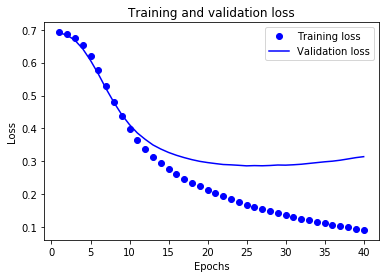

In [22]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

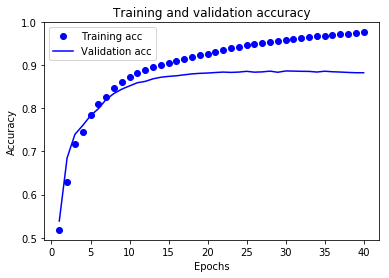

In [23]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()